In [84]:
import pandas as pd
import matplotlib.pyplot as plt

In [85]:
city_data=pd.read_csv("city_data.csv")
ride_data=pd.read_csv("ride_data.csv")

In [145]:
avg_fare=ride_data.groupby("city")["fare"].mean()
total_rides=ride_data.groupby("city")["city"].count()
total_fare=ride_data.groupby("city")["fare"].sum()

In [146]:
new_ride= pd.DataFrame(total_rides)
new_ride=new_ride.rename(columns={"city":"Total_Rides"})
new_ride["Average_Fare"]=avg_fare
new_ride["Total_Fare"]=total_fare
new_ride.head()

,Total_Rides,Average_Fare,Total_Fare
city,,,
Alvarezhaven,31,23.928710,741.79
Alyssaberg,26,20.609615,535.85
Anitamouth,9,37.315556,335.84
Antoniomouth,22,23.625000,519.75
Aprilchester,19,21.981579,417.65


In [147]:
new_ride=new_ride.reset_index()

In [148]:
merged_df = pd.merge(city_data, new_ride, on="city")
merged_df.head()

,city,driver_count,type,Total_Rides,Average_Fare,Total_Fare
0,Kelseyland,63,Urban,28,21.806429,610.58
1,Nguyenbury,8,Urban,26,25.899615,673.39
2,East Douglas,12,Urban,22,26.169091,575.72
3,West Dawnfurt,34,Urban,29,22.330345,647.58
4,Rodriguezburgh,52,Urban,23,21.332609,490.65


In [149]:
merged_df["driver_count"]=merged_df["driver_count"].astype(float)

merged_df["Total_Rides"]=merged_df["Total_Rides"].astype(float)

In [150]:
merged_df.dtypes

city             object
driver_count    float64
type             object
Total_Rides     float64
Average_Fare    float64
Total_Fare      float64
dtype: object

In [151]:
urban_df= merged_df.loc[merged_df["type"]== "Urban",:]
suburban_df= merged_df.loc[merged_df["type"]== "Suburban",:]
rural_df= merged_df.loc[merged_df["type"]== "Rural",:]

In [157]:
plt.scatter(urban_df.Total_Rides, urban_df.Average_Fare, s=urban_df.driver_count, marker="o", facecolors="lightcoral", edgecolors="black", label="Urban")
plt.scatter(suburban_df.Total_Rides, suburban_df.Average_Fare, s=suburban_df.driver_count, marker="o", facecolors="lightskyblue", edgecolors="black", label="Suburban")
plt.scatter(rural_df.Total_Rides, rural_df.Average_Fare, s=rural_df.driver_count, marker="o", facecolors="gold", edgecolors="black", label="Rural")

plt.title("Pyber Rideshare Date")
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.grid(True)
plt.legend(loc="best")

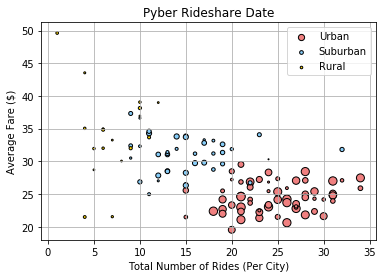

In [158]:
plt.show()

In [159]:
urban_fare=urban_df["Total_Fare"].sum()
suburban_fare=suburban_df["Total_Fare"].sum()
rural_fare=rural_df["Total_Fare"].sum()

In [188]:
labels=["Urban","Suburban","Rural"]
data=[urban_fare, suburban_fare, rural_fare]
colors=['lightcoral','lightskyblue','gold']
explode= (0, 0.1, 0.1)
plt.pie(data, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=220 )
plt.title("% of Total Fares by City Type")

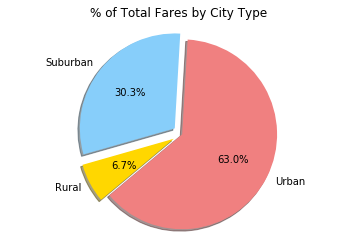

In [189]:
plt.axis('equal')
plt.show()

In [190]:
urban_rides=urban_df["Total_Rides"].sum()
suburban_rides=suburban_df["Total_Rides"].sum()
rural_rides=rural_df["Total_Rides"].sum()

In [191]:
labels=["Urban","Suburban","Rural"]
data=[urban_rides, suburban_rides, rural_rides]
colors=['lightcoral','lightskyblue','gold']
explode= (0, 0.1, 0.1)
plt.pie(data, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=220 )
plt.title("% of Total Rides by City Type")

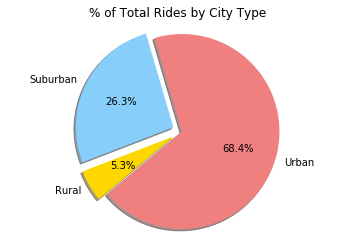

In [192]:
plt.axis('equal')
plt.show()

In [195]:
urban_drivers=urban_df["driver_count"].sum()
suburban_drivers=suburban_df["driver_count"].sum()
rural_drivers=rural_df["driver_count"].sum()

In [196]:
labels=["Urban","Suburban","Rural"]
data=[urban_drivers, suburban_drivers, rural_drivers]
colors=['lightcoral','lightskyblue','gold']
explode= (0, 0.1, 0.1)
plt.pie(data, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=220 )
plt.title("% of Total Drivers by City Type")

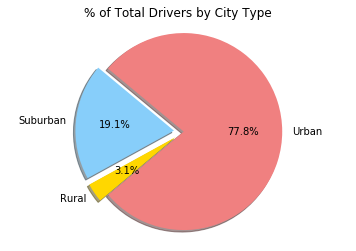

In [197]:
plt.axis('equal')
plt.show()